<a href="https://colab.research.google.com/github/athayadhiya/data_science_portfolio/blob/main/Titanic_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Titanic: Exploratory Data Analysis** ⚓
---
In this notebook, we'll do some exploratory analysis on the legendary [Titanic dataset](https://www.kaggle.com/competitions/titanic/data) from Kaggle and answer the question: “*what sorts of people were more likely to survive?*”.




In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Project/titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


This dataset contains 12 columns and 891 rows.

But, as we can see, Cabin column have a lot of missing values. Only 204/891 data were listed. So, we'll just going to drop this column.

Age column have some of missing values too, but we can deal with this later.

In [ ]:
df = df.drop('Cabin', axis = 1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age Group,Companion,Companion Def
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,working age,1,not alone
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,working age,1,not alone
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,working age,0,alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,working age,1,not alone
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,working age,0,alone


First, we'll start from **Sex** and **Age** of the passengers.

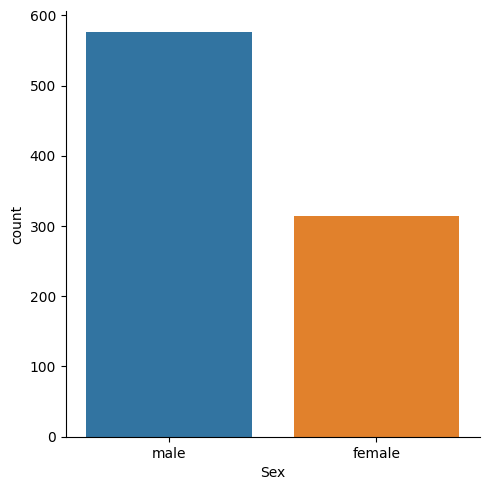

In [43]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.catplot(data = df, x = 'Sex', kind = 'count')

Unsurprisingly, there were more male passenger aboard.

Before we analyze the passengers age, we have to deal with the missing values. We'll fill the missing values with mean values.



In [ ]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

<Axes: >

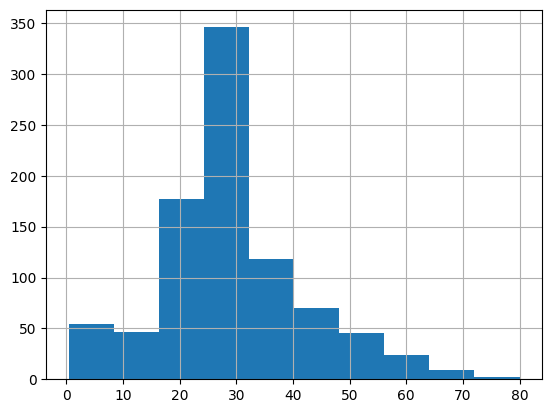

In [ ]:
df['Age'].hist()

The passengers age were quite varies. There was young and older people, but dominated with the late twenties.

To ease this analysis process, we'll try to group the age into 3 categories: young age (<0 - 14), working age (15 - 64) and older age (>65).

In [ ]:
def age_group(df):
  age = df['Age']

  if age < 15:
    return 'young age'
  elif age >= 15 and age < 65:
    return 'working age'
  elif age >= 65:
    return 'older age'

df['Age Group'] = df.apply(age_group, axis = 1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age Group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,working age
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,working age
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,working age
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,working age
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,working age


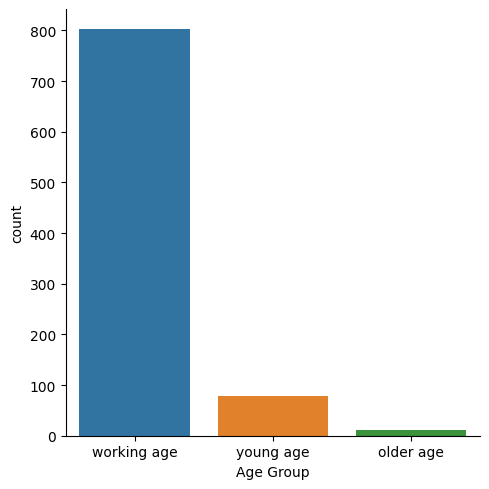

In [58]:
sns.catplot(data = df, x = 'Age Group', kind = 'count')

Of course, most passsengers were in their working age and least passengers were in their older age.

Let's take a look on Sex and Age relation.

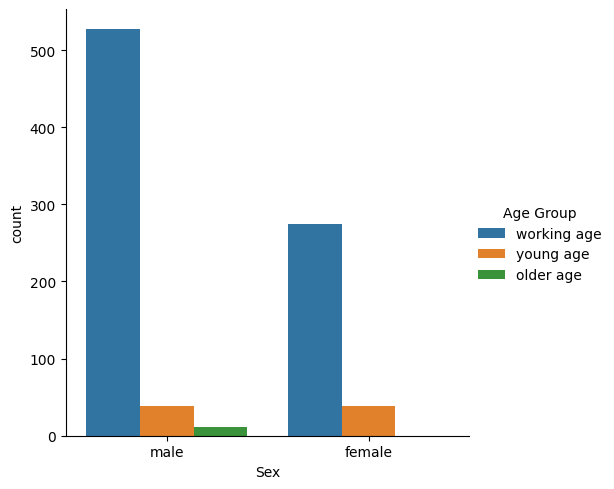

In [61]:
sns.catplot(data = df, x = 'Sex', hue = 'Age Group', kind = 'count')

Here, we discover the fact that the older age people were only male.

Now for the question, how is this Sex and Age affect the passengers survival chance?

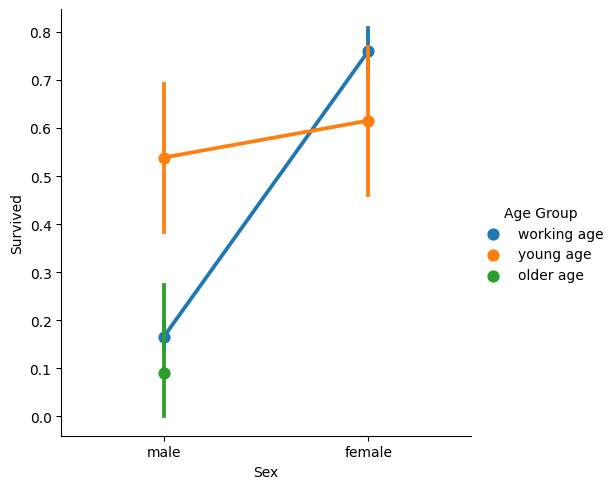

In [ ]:
sns.catplot(data = df, x = 'Sex', y = 'Survived', hue = 'Age Group', kind = 'point')

From above, we can see that by Sex, female passengers have higher chance of survival than male passengers. Young male passengers have higher chance of survival than other male passengers. Older male passengers have lowest chance of survival.

This probably because of the '*save women and childern first*' principle, while the older people passengers don't have the time or ability to save themselves.

Next, **SibSp** and **Parch** of the passengers.
> SibSp is the number of sibling or spouse aboard.

> Parch is the number of parent or childern aboard.

We'll add SibSp and Parch as companion, and define whether the passengers were alone or not. If the companion = 0 then they're alone and if the companion > 0 then they're not alone.


In [ ]:
df['Companion'] = df['SibSp'] + df['Parch']
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age Group,Companion
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,working age,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,working age,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,working age,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,working age,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,working age,0


In [ ]:
def companion(df):
  companion = df['Companion']

  if companion >= 1:
    return 'not alone'
  else:
    return 'alone'

df['Companion Def'] = df.apply(companion, axis = 1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age Group,Companion,Companion Def
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,working age,1,not alone
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,working age,1,not alone
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,working age,0,alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,working age,1,not alone
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,working age,0,alone


In [ ]:
df['Companion Def'].value_counts()

alone        537
not alone    354
Name: Companion Def, dtype: int64

About 65% of the passengers were alone.

Now for the question, how is this SibSp and Parch as companion affect the passengers survival chance?

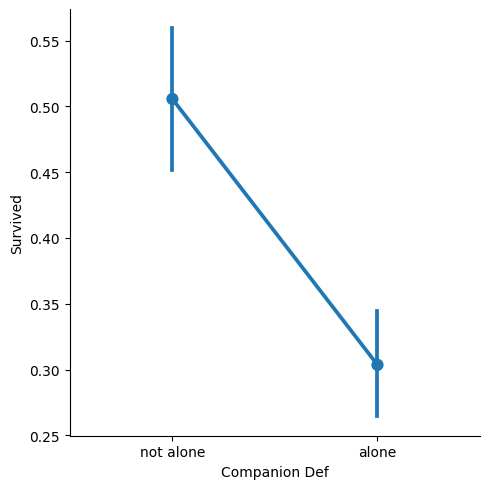

In [ ]:
sns.catplot(data = df, x = 'Companion Def', y = 'Survived', kind = 'point')

By the companion, the not alone passengers have higher chance of survival.

This probably because the not alone passengers have the chance to notify and save each other when the incident happen.

Next, **Fare**, **Embarked** and **Pclass** of the passengers.

In [ ]:
fare_pivot = df.pivot_table(index = 'Embarked', columns = 'Pclass', values = 'Fare', aggfunc = 'count', margins = True)
fare_pivot

Pclass,1,2,3,All
Embarked,,,,
C,85,17,66,168
Q,2,3,72,77
S,127,164,353,644
All,214,184,491,889


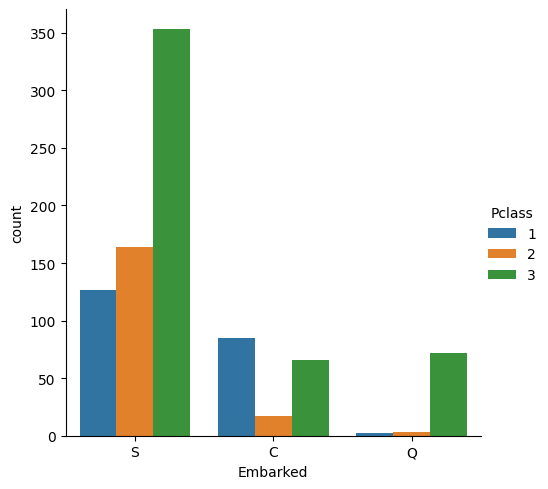

In [ ]:
sns.catplot(data = df, x = 'Embarked', hue = 'Pclass', kind = 'count')

In [ ]:
fare_pivot2 = df.pivot_table(index = 'Embarked', columns = 'Pclass', values = 'Fare', aggfunc = 'mean', margins = True)
fare_pivot2

Pclass,1,2,3,All
Embarked,,,,
C,104.718529,25.358335,11.214083,59.954144
Q,90.000000,12.350000,11.183393,13.276030
S,70.364862,20.327439,14.644083,27.079812
All,84.193516,20.662183,13.675550,32.096681


In [62]:
fare_pivot3 = df.pivot_table(index = 'Embarked', columns = 'Pclass', values = 'Fare', aggfunc = 'max', margins = True)
fare_pivot3

Pclass,1,2,3,All
Embarked,,,,
C,512.3292,41.5792,22.3583,512.3292
Q,90.0000,12.3500,29.1250,90.0000
S,263.0000,73.5000,69.5500,263.0000
All,512.3292,73.5000,69.5500,512.3292


To be noted, this ship route starts from Southampton - Cherbourg - Queenstown.

From above, we can see that from most to least, the passengers were embarked from Southampton (S), Cherbourg (C) and Queenstown (Q). So, its reasonable.

We can also see that the mean fare from Cherbourg were higher than Southampton. Its seem unreasonable. But when we see the maximum fare, there were passenger from Cherbourg that paid 500$ for 1st class, and this may raise the mean values.

And of course, the 1st class were more expensive than 2nd and 3rd class.

Now for the question, how is this Pclass affect the passengers survival chance?

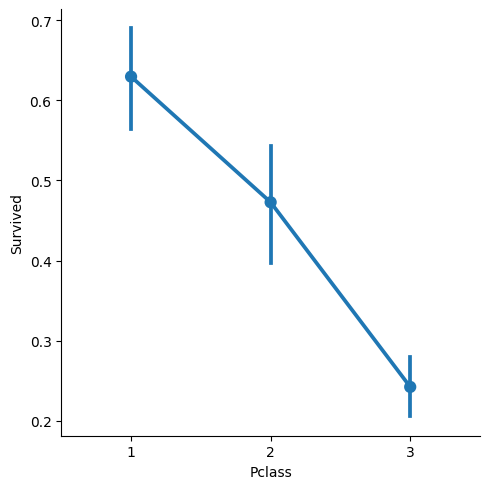

In [ ]:
sns.catplot(data = df, x = 'Pclass', y = 'Survived', kind = 'point')

By the Pclass, the 1st class passengers have higher chance of survival.

This probably because the 1st class passenger have the priority and better access to the rescue.

So, to summarize, the answer to the question: "*what sorts of people were more likely to survive?*" is **female, young age, have companion and in 1st class passengers.**

Next, in [this notebook] (https://github.com/athayadhiya/data_science_portfolio/blob/main/Titanic_ML_LogisticRegression.ipynb), we'll make a machine learning model to predict whether the passengers going to survive or not. ▶